In [47]:
import pandas as pd 
import numpy as np
import os      
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
path="C:/Users/Yusuke/Dropbox/Georgia_tech/GT_KIDS/Results/"
Folder_name="Processtime_dynamic_mul5_twoport_simulationtime_300s/"     # First of all, you need to select the folder name !!!!

In [48]:
def Get_Latency(df_algo_time):
    print(df_algo_time.describe())
    sns.set()
    df_algo_time.hist()
    plt.xlabel("Time(s)")
    plt.ylabel("Frequency")
    return df_algo_time.mean()
    
def Get_aggregation(KID1_table, KID3_table, KID7_table, KID9_table, KID11_table,):
    aggre=pd.concat([KID1_table, KID3_table, KID7_table, KID9_table, KID11_table])
    aggre=aggre.sort_index()
    print(aggre.describe())
    aggre.hist()
    return aggre
    
def Get_DetailsOfKID(KID_table):
    sns.set()
    KID_table.plot()
    KID_table.hist()
    print(KID_table.describe())
    
def Get_Elapsed_time(KID_table):
    elapsed_time=[]
    for i in range(len(KID_table)):
        time=KID_table.index[i]-KID_table.index[0]
        elapsed_time.append(time)
    return elapsed_time

def __datetime(date_str):
    return datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S.%f')

def EpTget(KID_table_datetime):
    
    ElapsedTime=[]
    for i in range(len(KID_table_datetime.index)):
        tmp=__datetime(KID_table_datetime.index[i]) - __datetime(KID_table_datetime.index[0])
        ElapsedTime.append(tmp.total_seconds())
    return ElapsedTime

def Get_allKID(Ipt_Kid1, Ipt_Kid3, Ipt_Kid7, Ipt_Kid9, Ipt_Kid11, column_name):
    a=Ipt_Kid1[column_name]
    a.name=column_name+'_KID1'
    b=Ipt_Kid3[column_name]
    b.name=column_name+'_KID3'
    c=Ipt_Kid7[column_name]
    c.name=column_name+'_KID7'
    d=Ipt_Kid9[column_name]
    d.name=column_name+'_KID9'
    e=Ipt_Kid11[column_name]
    e.name=column_name+'_KID11'
    imash=pd.concat([a,b,c,d,e], axis=1).sort_index()
    imash_itp=imash.interpolate()
    return imash_itp

def MakeElapsedTable(Table):
    ELT=pd.concat([Table.reset_index(), pd.DataFrame(EpTget(Table), columns=['Elapsed time (s)'])], axis=1)
    ELT=ELT.set_index('Elapsed time (s)')
    return ELT

# Reading Data

In [49]:
KID1_table_RR=pd.read_pickle(path+Folder_name+"KID1_RR.pkl")
KID3_table_RR=pd.read_pickle(path+Folder_name+"KID3_RR.pkl")
KID7_table_RR=pd.read_pickle(path+Folder_name+"KID7_RR.pkl")
KID9_table_RR=pd.read_pickle(path+Folder_name+"KID9_RR.pkl")
KID11_table_RR=pd.read_pickle(path+Folder_name+"KID11_RR.pkl")
df_algo_time_RR=pd.read_pickle(path+Folder_name+"df_algo_time_RR.pkl")
KID1_serve_time_RR=pd.read_pickle(path+Folder_name+"KID1_serve_time_RR.pkl")
KID3_serve_time_RR=pd.read_pickle(path+Folder_name+"KID3_serve_time_RR.pkl")
KID7_serve_time_RR=pd.read_pickle(path+Folder_name+"KID7_serve_time_RR.pkl")
KID9_serve_time_RR=pd.read_pickle(path+Folder_name+"KID9_serve_time_RR.pkl")
KID11_serve_time_RR=pd.read_pickle(path+Folder_name+"KID11_serve_time_RR.pkl")

KID1_table_CPUbased=pd.read_pickle(path+Folder_name+"KID1_CPUbased.pkl")
KID3_table_CPUbased=pd.read_pickle(path+Folder_name+"KID3_CPUbased.pkl")
KID7_table_CPUbased=pd.read_pickle(path+Folder_name+"KID7_CPUbased.pkl")
KID9_table_CPUbased=pd.read_pickle(path+Folder_name+"KID9_CPUbased.pkl")
KID11_table_CPUbased=pd.read_pickle(path+Folder_name+"KID11_CPUbased.pkl")
df_algo_time_CPUbased=pd.read_pickle(path+Folder_name+"df_algo_time_CPUbased.pkl")
KID1_serve_time_CPUbased=pd.read_pickle(path+Folder_name+"KID1_serve_time_CPUbased.pkl")
KID3_serve_time_CPUbased=pd.read_pickle(path+Folder_name+"KID3_serve_time_CPUbased.pkl")
KID7_serve_time_CPUbased=pd.read_pickle(path+Folder_name+"KID7_serve_time_CPUbased.pkl")
KID9_serve_time_CPUbased=pd.read_pickle(path+Folder_name+"KID9_serve_time_CPUbased.pkl")
KID11_serve_time_CPUbased=pd.read_pickle(path+Folder_name+"KID11_serve_time_CPUbased.pkl")

KID1_table_Thermalbased=pd.read_pickle(path+Folder_name+"KID1_Thermalbased.pkl")
KID3_table_Thermalbased=pd.read_pickle(path+Folder_name+"KID3_Thermalbased.pkl")
KID7_table_Thermalbased=pd.read_pickle(path+Folder_name+"KID7_Thermalbased.pkl")
KID9_table_Thermalbased=pd.read_pickle(path+Folder_name+"KID9_Thermalbased.pkl")
KID11_table_Thermalbased=pd.read_pickle(path+Folder_name+"KID11_Thermalbased.pkl")
df_algo_time_Thermalbased=pd.read_pickle(path+Folder_name+"df_algo_time_Thermalbased.pkl")
KID1_serve_time_Thermalbased=pd.read_pickle(path+Folder_name+"KID1_serve_time_Thermalbased.pkl")
KID3_serve_time_Thermalbased=pd.read_pickle(path+Folder_name+"KID3_serve_time_Thermalbased.pkl")
KID7_serve_time_Thermalbased=pd.read_pickle(path+Folder_name+"KID7_serve_time_Thermalbased.pkl")
KID9_serve_time_Thermalbased=pd.read_pickle(path+Folder_name+"KID9_serve_time_Thermalbased.pkl")
KID11_serve_time_Thermalbased=pd.read_pickle(path+Folder_name+"KID11_serve_time_Thermalbased.pkl")

# Each KID servers detail 

          FAN (%)          PS  CPU_utilization  CPU_temperature(degC)
count  963.000000  957.000000       962.000000             965.000000
mean    28.903551    4.026750         2.175140              56.717789
std      1.836707    6.711480         0.973106               1.443466
min     28.620000    0.100000         0.440000              54.000000
25%     28.620000    1.450000         1.440000              55.583333
50%     28.620000    2.328571         2.080000              56.687500
75%     28.620000    3.242857         3.130000              57.312500
max     41.940000   57.400000         3.860000              64.250000


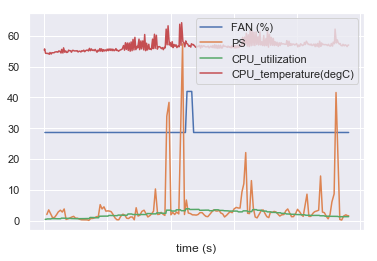

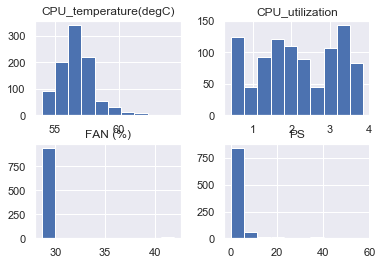

In [4]:
Get_DetailsOfKID(KID1_table_CPUbased)

# Resampling

C:\Users\Yusuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



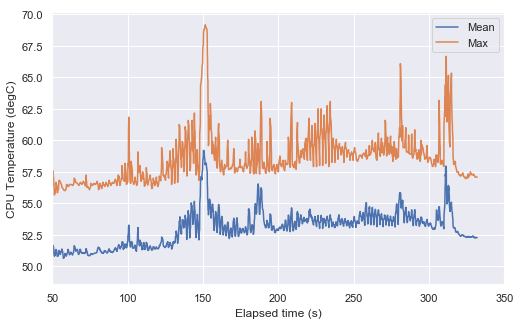

In [51]:
sns.set()
RR=MakeElapsedTable(Get_allKID(KID1_table_RR, KID3_table_RR, KID7_table_RR, KID9_table_RR, KID11_table_RR, 'CPU_temperature(degC)'))
plt.figure(figsize=(8.1, 5))
RR.mean(axis=1).plot(label="Mean")
RR.max(axis=1).plot(label="Max")
plt.ylabel("CPU Temperature (degC)")
plt.xlim(50, 350)
plt.legend()

In [52]:
RR

,index,CPU_temperature(degC)_KID1,CPU_temperature(degC)_KID3,CPU_temperature(degC)_KID7,CPU_temperature(degC)_KID9,CPU_temperature(degC)_KID11
Elapsed time (s),,,,,,
0.000000,2018-10-29 00:53:45.838501,NaN,54.333333,NaN,NaN,NaN
1.009828,2018-10-29 00:53:46.848329,NaN,53.500000,NaN,NaN,NaN
1.900113,2018-10-29 00:53:47.738614,NaN,53.527778,NaN,NaN,NaN
2.000223,2018-10-29 00:53:47.838724,NaN,53.555556,NaN,NaN,NaN
2.018151,2018-10-29 00:53:47.856652,NaN,53.583333,NaN,NaN,NaN
3.013280,2018-10-29 00:53:48.851781,NaN,53.666667,NaN,NaN,NaN
3.025733,2018-10-29 00:53:48.864234,NaN,53.750000,NaN,NaN,NaN
3.592532,2018-10-29 00:53:49.431033,NaN,53.687500,NaN,NaN,NaN
4.004212,2018-10-29 00:53:49.842713,NaN,53.625000,NaN,NaN,NaN


C:\Users\Yusuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



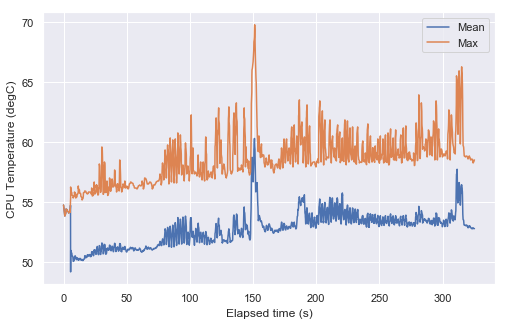

In [6]:
CPU_based=MakeElapsedTable(Get_allKID(KID1_table_CPUbased, KID3_table_CPUbased, KID7_table_CPUbased, KID9_table_CPUbased, KID11_table_CPUbased, 'CPU_temperature(degC)'))
plt.figure(figsize=(8.1, 5))
CPU_based.mean(axis=1).plot(label="Mean")
CPU_based.max(axis=1).plot(label="Max")
plt.ylabel("CPU Temperature (degC)")
plt.legend()

C:\Users\Yusuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



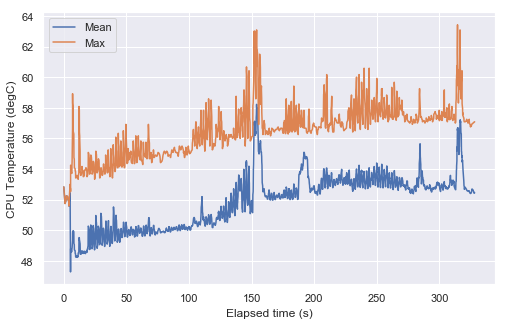

In [7]:
Thermal_based=MakeElapsedTable(Get_allKID(KID1_table_Thermalbased, KID3_table_Thermalbased, KID7_table_Thermalbased, KID9_table_Thermalbased, KID11_table_Thermalbased, 'CPU_temperature(degC)'))
plt.figure(figsize=(8.1, 5))
Thermal_based.mean(axis=1).plot(label="Mean")
Thermal_based.max(axis=1).plot(label="Max")
plt.ylabel("CPU Temperature (degC)")
plt.legend()

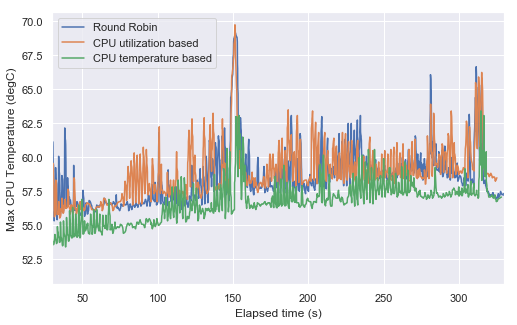

In [8]:
plt.figure(figsize=(8.1, 5))
RR.max(axis=1).plot(label="Round Robin")
CPU_based.max(axis=1).plot(label="CPU utilization based")
Thermal_based.max(axis=1).plot(label="CPU temperature based")
plt.ylabel("Max CPU Temperature (degC)")
plt.xlim(30, 330)
plt.legend()

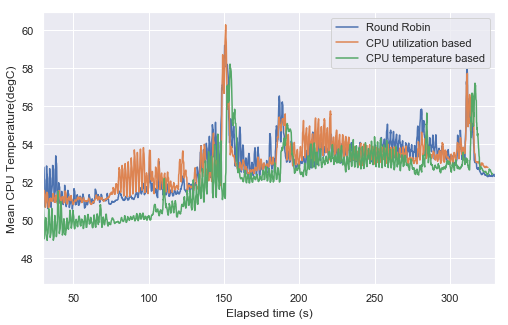

In [9]:
plt.figure(figsize=(8.1, 5))
RR.mean(axis=1).plot(label="Round Robin")
CPU_based.mean(axis=1).plot(label="CPU utilization based")
Thermal_based.mean(axis=1).plot(label="CPU temperature based")
plt.ylabel("Mean CPU Temperature(degC)")
plt.xlim(30, 330)
plt.legend()

C:\Users\Yusuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



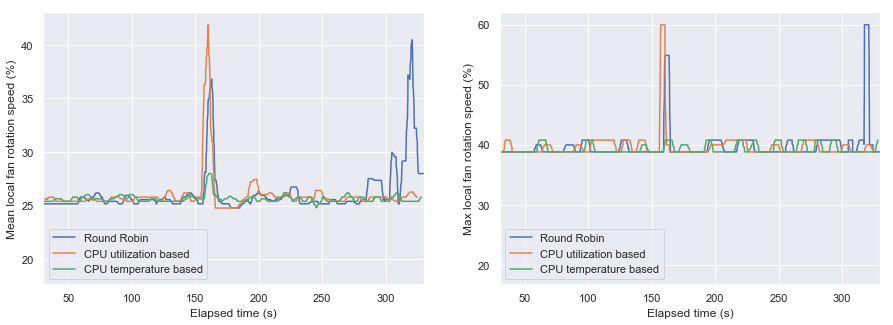

In [10]:
RR_fan=MakeElapsedTable(Get_allKID(KID1_table_RR, KID3_table_RR, KID7_table_RR, KID9_table_RR, KID11_table_RR, 'FAN (%)'))
CPU_based_fan=MakeElapsedTable(Get_allKID(KID1_table_CPUbased, KID3_table_CPUbased, KID7_table_CPUbased, KID9_table_CPUbased, KID11_table_CPUbased, 'FAN (%)'))
Thermal_based_fan=MakeElapsedTable(Get_allKID(KID1_table_Thermalbased, KID3_table_Thermalbased, KID7_table_Thermalbased, KID9_table_Thermalbased, KID11_table_Thermalbased, 'FAN (%)'))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
RR_fan.mean(axis=1).plot(label="Round Robin")
CPU_based_fan.mean(axis=1).plot(label="CPU utilization based")
Thermal_based_fan.mean(axis=1).plot(label="CPU temperature based")
plt.ylabel("Mean local fan rotation speed (%)")
plt.xlim(30, 330)
plt.legend()

plt.subplot(1, 2, 2)
RR_fan.max(axis=1).plot(label="Round Robin")
CPU_based_fan.max(axis=1).plot(label="CPU utilization based")
Thermal_based_fan.max(axis=1).plot(label="CPU temperature based")
plt.ylabel("Max local fan rotation speed (%)")
plt.xlim(30, 330)
plt.legend()

C:\Users\Yusuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



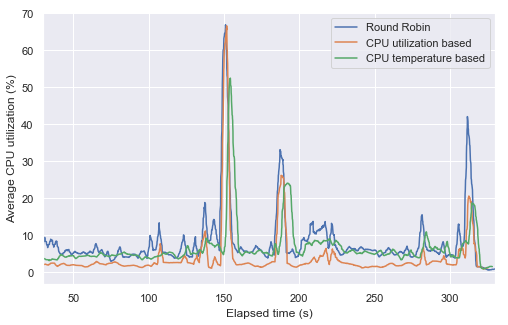

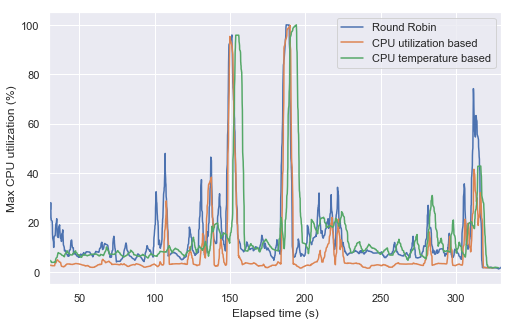

In [11]:
RR_ps=MakeElapsedTable(Get_allKID(KID1_table_RR, KID3_table_RR, KID7_table_RR, KID9_table_RR, KID11_table_RR, 'PS'))
CPU_based_ps=MakeElapsedTable(Get_allKID(KID1_table_CPUbased, KID3_table_CPUbased, KID7_table_CPUbased, KID9_table_CPUbased, KID11_table_CPUbased, 'PS'))
Thermal_based_ps=MakeElapsedTable(Get_allKID(KID1_table_Thermalbased, KID3_table_Thermalbased, KID7_table_Thermalbased, KID9_table_Thermalbased, KID11_table_Thermalbased, 'PS'))

plt.figure(figsize=(8.1, 5))
RR_ps.mean(axis=1).plot(label="Round Robin")
CPU_based_ps.mean(axis=1).plot(label="CPU utilization based")
Thermal_based_ps.mean(axis=1).plot(label="CPU temperature based")
plt.ylabel("Average CPU utilization (%)")
plt.xlim(30, 330)
plt.legend()

plt.figure(figsize=(8.1, 5))
RR_ps.max(axis=1).plot(label="Round Robin")
CPU_based_ps.max(axis=1).plot(label="CPU utilization based")
Thermal_based_ps.max(axis=1).plot(label="CPU temperature based")
plt.ylabel("Max CPU utilization (%)")
plt.xlim(30, 330)
plt.legend()

# Round Robin Histgram

       Latency (s)
count   299.000000
mean      1.001640
std       0.000715
min       1.000493
25%       1.001225
50%       1.001260
75%       1.001769
max       1.004717


Latency (s)    1.00164
dtype: float64

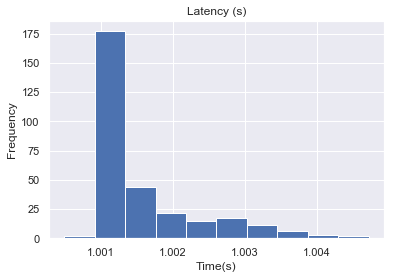

In [12]:
Get_Latency(df_algo_time_RR)

           FAN (%)           PS  CPU_utilization  CPU_temperature(degC)
count  4896.000000  4866.000000      4891.000000            4906.000000
mean     26.134493     7.804490         1.460141              52.723859
std       8.163209    10.075611         0.991823               6.915174
min      18.820000     0.100000         0.080000              37.083333
25%      18.820000     3.654167         0.670000              51.473958
50%      20.780000     5.566667         1.270000              55.201389
75%      28.620000     7.883333         1.950000              57.250000
max      59.980000   100.000000         4.920000              69.166667


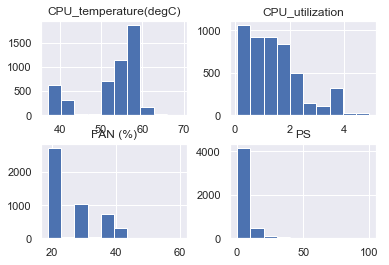

In [13]:
RR_hist=Get_aggregation(KID1_table_RR, KID3_table_RR, KID7_table_RR, KID9_table_RR, KID11_table_RR)

# CPU utilization based 

       Latency (s)
count   299.000000
mean      1.001782
std       0.000688
min       1.000605
25%       1.001420
50%       1.001478
75%       1.001878
max       1.004661


Latency (s)    1.001782
dtype: float64

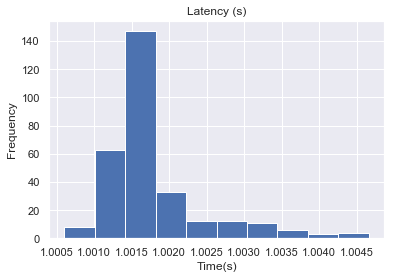

In [14]:
Get_Latency(df_algo_time_CPUbased)

           FAN (%)           PS  CPU_utilization  CPU_temperature(degC)
count  4807.000000  4777.000000      4802.000000            4817.000000
mean     25.945381     3.985922         1.509005              52.760726
std       7.993168     9.155434         1.113103               7.029544
min      18.820000     0.100000         0.110000              37.083333
25%      18.820000     1.633333         0.560000              50.916667
50%      21.950000     2.200000         1.200000              55.458333
75%      28.620000     3.040000         2.330000              57.395833
max      59.980000    99.700000         5.170000              69.750000


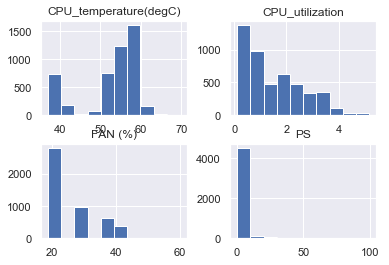

In [15]:
CPU_based_hist=Get_aggregation(KID1_table_CPUbased, KID3_table_CPUbased, KID7_table_CPUbased, KID9_table_CPUbased, KID11_table_CPUbased)

# Thermal based 

       Latency (s)
count   299.000000
mean      1.001664
std       0.000538
min       1.000477
25%       1.001423
50%       1.001468
75%       1.001692
max       1.005108


Latency (s)    1.001664
dtype: float64

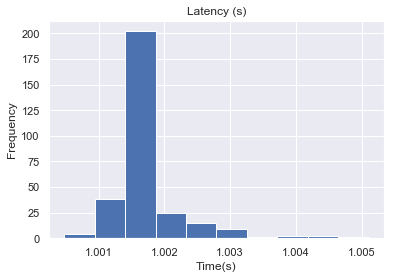

In [16]:
Get_Latency(df_algo_time_Thermalbased)

           FAN (%)           PS  CPU_utilization  CPU_temperature(degC)
count  4853.000000  4824.000000      4850.000000            4864.000000
mean     25.656660     6.354364         1.608073              51.903697
std       7.676908     9.400730         1.455882               5.866803
min      18.820000     0.100000         0.000000              36.000000
25%      18.820000     2.732143         0.530000              49.791667
50%      21.950000     4.200000         1.140000              53.916667
75%      28.620000     6.833333         2.220000              56.027778
max      40.770000   100.000000         8.120000              63.416667


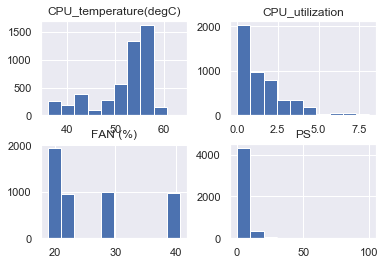

In [17]:
Thermal_based_hist=Get_aggregation(KID1_table_Thermalbased, KID3_table_Thermalbased, KID7_table_Thermalbased, KID9_table_Thermalbased, KID11_table_Thermalbased)

In [18]:
print(RR_hist.describe(), "\n", CPU_based_hist.describe(),"\n", Thermal_based_hist.describe())

           FAN (%)           PS  CPU_utilization  CPU_temperature(degC)
count  4896.000000  4866.000000      4891.000000            4906.000000
mean     26.134493     7.804490         1.460141              52.723859
std       8.163209    10.075611         0.991823               6.915174
min      18.820000     0.100000         0.080000              37.083333
25%      18.820000     3.654167         0.670000              51.473958
50%      20.780000     5.566667         1.270000              55.201389
75%      28.620000     7.883333         1.950000              57.250000
max      59.980000   100.000000         4.920000              69.166667 
            FAN (%)           PS  CPU_utilization  CPU_temperature(degC)
count  4807.000000  4777.000000      4802.000000            4817.000000
mean     25.945381     3.985922         1.509005              52.760726
std       7.993168     9.155434         1.113103               7.029544
min      18.820000     0.100000         0.110000              

In [19]:
table_mean=pd.DataFrame({'Round Robin':RR_hist.mean(), 
               'CPU utilization based':CPU_based_hist.mean(), 
              'CPU temperature based':Thermal_based_hist.mean()})
table_mean.rename(index={'FAN (%)':'Average local fan rotation speed (%)', 'PS':'Average CPU utilization (%)', 
                         'CPU_utilization':'Average system load', 'CPU_temperature(degC)':'Average CPU temperature (degC)'})

,Round Robin,CPU utilization based,CPU temperature based
Average local fan rotation speed (%),26.134493,25.945381,25.656660
Average CPU utilization (%),7.804490,3.985922,6.354364
Average system load,1.460141,1.509005,1.608073
Average CPU temperature (degC),52.723859,52.760726,51.903697


In [20]:
table_std=pd.DataFrame({'Round Robin':RR_hist.std(), 
               'CPU utilization based':CPU_based_hist.std(), 
              'CPU temperature based':Thermal_based_hist.std()})
table_std.rename(index={'FAN (%)':'Standard deviation of local fan rotation speed (%)', 'PS':'Standard deviation of average CPU utilization (%)', 
                         'CPU_utilization':'Standard deviation of average system load', 'CPU_temperature(degC)':'Standard deviation of average CPU temperature (degC)'})

,Round Robin,CPU utilization based,CPU temperature based
Standard deviation of local fan rotation speed (%),8.163209,7.993168,7.676908
Standard deviation of average CPU utilization (%),10.075611,9.155434,9.400730
Standard deviation of average system load,0.991823,1.113103,1.455882
Standard deviation of average CPU temperature (degC),6.915174,7.029544,5.866803


In [21]:
table_max=pd.DataFrame({'Round Robin':RR_hist.max(), 
               'CPU utilization based':CPU_based_hist.max(), 
              'CPU temperature based':Thermal_based_hist.max()})
table_max.rename(index={'FAN (%)':'Max local fan rotation speed (%)', 'PS':'Max CPU utilization (%)', 
                         'CPU_utilization':'Max system load', 'CPU_temperature(degC)':'Max CPU temperature (degC)'})

,Round Robin,CPU utilization based,CPU temperature based
Max local fan rotation speed (%),59.980000,59.98,40.770000
Max CPU utilization (%),100.000000,99.70,100.000000
Max system load,4.920000,5.17,8.120000
Max CPU temperature (degC),69.166667,69.75,63.416667


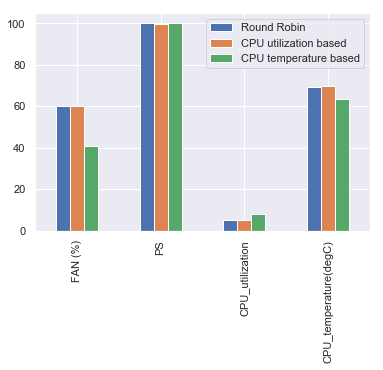

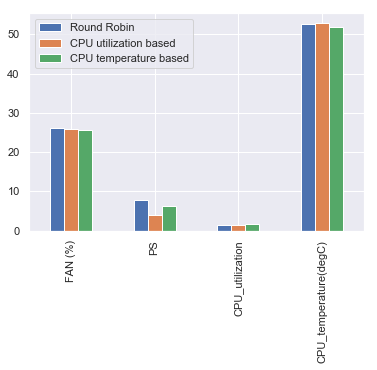

In [22]:
table_max.plot.bar()
table_mean.plot.bar()

# Histgram evaluation

(0, 6000)

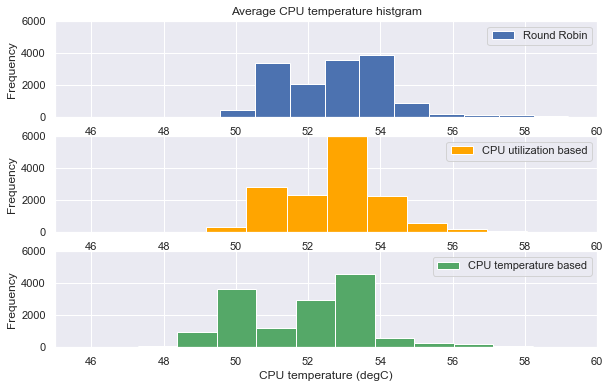

In [23]:
# For mean
hoge=pd.concat([RR.mean(axis=1), CPU_based.mean(axis=1), Thermal_based.mean(axis=1)], axis=1).sort_index().interpolate()
hoge.columns=['RR', 'CPU_based', 'Thermal_based']
# Golden ration 1:1.618
plt.figure(figsize=( 6*1.618, 6))
plt.subplot(3,1,1)
hoge['RR'].hist(label="Round Robin", color='b')
plt.title("Average CPU temperature histgram")
plt.ylabel("Frequency")
plt.legend()
plt.xlim(45,60)
plt.ylim(0, 6000)
plt.subplot(3, 1, 2)
hoge['CPU_based'].hist(label="CPU utilization based", color='orange')
plt.ylabel("Frequency")
plt.legend()
plt.xlim(45,60)
plt.ylim(0, 6000)
plt.subplot(3, 1, 3)
hoge['Thermal_based'].hist(label="CPU temperature based", color='g')
plt.xlabel("CPU temperature (degC)")
plt.ylabel("Frequency")
plt.legend()
plt.xlim(45,60)
plt.ylim(0, 6000)

(0, 6000)

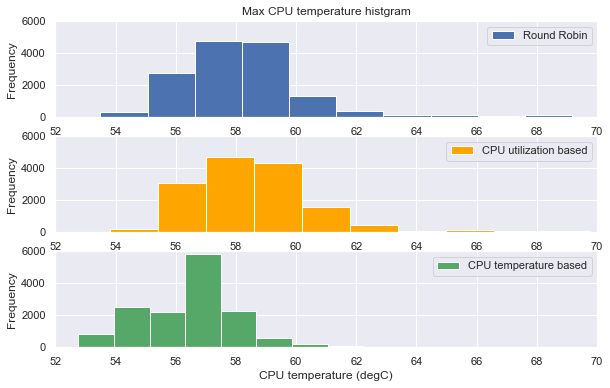

In [24]:
# For max
hoge=pd.concat([RR.max(axis=1), CPU_based.max(axis=1), Thermal_based.max(axis=1)], axis=1).sort_index().interpolate()
hoge.columns=['RR', 'CPU_based', 'Thermal_based']
# Golden ration 1:1.618
plt.figure(figsize=( 6*1.618, 6))
plt.subplot(3,1,1)
hoge['RR'].hist(label="Round Robin", color='b')
plt.title("Max CPU temperature histgram")
plt.ylabel("Frequency")
plt.legend()
plt.xlim(52,70)
plt.ylim(0, 6000)
plt.subplot(3, 1, 2)
hoge['CPU_based'].hist(label="CPU utilization based", color='orange')
plt.ylabel("Frequency")
plt.legend()
plt.xlim(52, 70)
plt.ylim(0, 6000)
plt.subplot(3, 1, 3)
hoge['Thermal_based'].hist(label="CPU temperature based", color='g')
plt.xlabel("CPU temperature (degC)")
plt.ylabel("Frequency")
plt.legend()
plt.xlim(52, 70)
plt.ylim(0, 6000)

In [25]:
print(len(RR_hist), len(CPU_based_hist), len(Thermal_based_hist))

4906 4817 4864


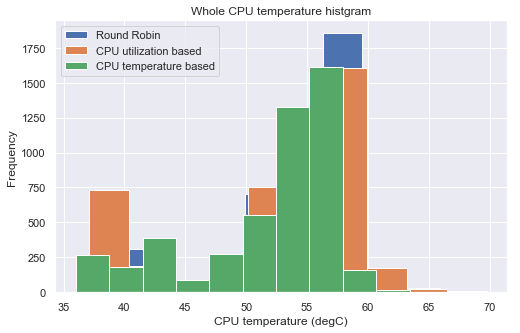

In [26]:
# For all 
""" The problem is that each method has different frequency"""
plt.figure(figsize=(8.1, 5))
RR_hist['CPU_temperature(degC)'].hist(label="Round Robin")
CPU_based_hist['CPU_temperature(degC)'].hist(label="CPU utilization based")
Thermal_based_hist['CPU_temperature(degC)'].hist(label="CPU temperature based")
plt.title("Whole CPU temperature histgram")
plt.xlabel("CPU temperature (degC)")
plt.ylabel("Frequency")
plt.legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


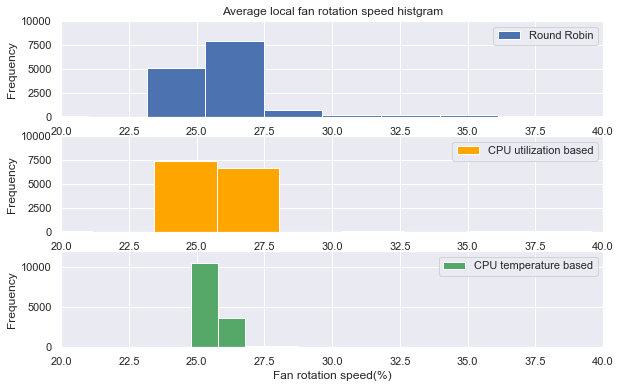

In [27]:
# For mean
hoge=pd.concat([RR_fan.mean(axis=1), CPU_based_fan.mean(axis=1), Thermal_based_fan.mean(axis=1)], axis=1).sort_index().interpolate()
hoge.columns=['RR', 'CPU_based', 'Thermal_based']
plt.figure(figsize=( 6*1.618, 6))


plt.subplot(3,1,1)
plt.title("Average local fan rotation speed histgram")
hoge['RR'].hist(label="Round Robin", color='b')
plt.xlim(20, 40)
plt.ylim(0, 10000)
plt.ylabel("Frequency")
plt.legend()

plt.subplot(3,1,2)
plt.legend()
hoge['CPU_based'].hist(label="CPU utilization based", color='orange')
plt.xlim(20, 40)
plt.ylim(0, 10000)
plt.ylabel("Frequency")
plt.legend()

plt.subplot(3,1,3)
plt.legend()
hoge['Thermal_based'].hist(label="CPU temperature based", color='g')
plt.xlim(20, 40)
plt.ylim(0, 12000)
plt.xlabel("Fan rotation speed(%)")
plt.ylabel("Frequency")
plt.legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


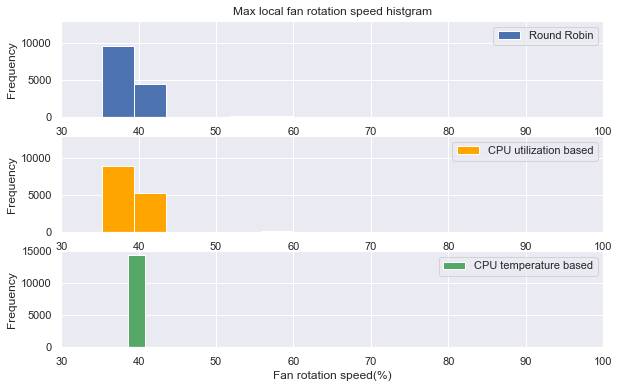

In [28]:
# For max
hoge=pd.concat([RR_fan.max(axis=1), CPU_based_fan.max(axis=1), Thermal_based_fan.max(axis=1)], axis=1).sort_index().interpolate()
hoge.columns=['RR', 'CPU_based', 'Thermal_based']
plt.figure(figsize=( 6*1.618, 6))


plt.subplot(3,1,1)
plt.title("Max local fan rotation speed histgram")
hoge['RR'].hist(label="Round Robin", color='b')
plt.xlim(30, 100)
plt.ylim(0, 13000)
plt.ylabel("Frequency")
plt.legend()

plt.subplot(3,1,2)
plt.legend()
hoge['CPU_based'].hist(label="CPU utilization based", color='orange')
plt.xlim(30, 100)
plt.ylim(0, 13000)
plt.ylabel("Frequency")
plt.legend()

plt.subplot(3,1,3)
plt.legend()
hoge['Thermal_based'].hist(label="CPU temperature based", color='g')
plt.xlim(30, 100)
plt.ylim(0, 15000)
plt.xlabel("Fan rotation speed(%)")
plt.ylabel("Frequency")
plt.legend()

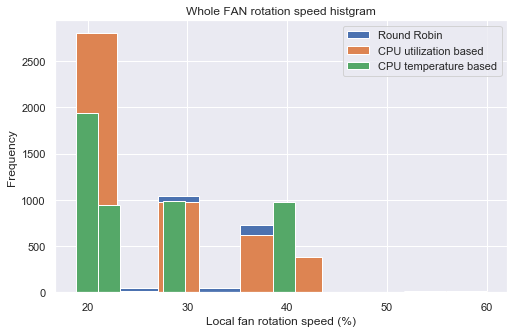

In [29]:
# For all 
""" The problem is that each method has different frequency"""
plt.figure(figsize=(8.1, 5))
RR_hist['FAN (%)'].hist(label="Round Robin")
CPU_based_hist['FAN (%)'].hist(label="CPU utilization based")
Thermal_based_hist['FAN (%)'].hist(label="CPU temperature based")
plt.title("Whole FAN rotation speed histgram")
plt.xlabel("Local fan rotation speed (%)")
plt.ylabel("Frequency")
plt.legend()

# Server Process time evaluation

       Server Processing time (s)
count                  750.000000
mean                     0.237389
std                      0.220033
min                      0.000021
25%                      0.147771
50%                      0.185004
75%                      0.237435
max                      3.039344


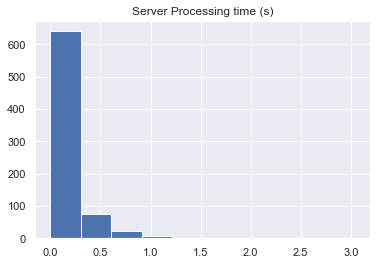

In [30]:
RR_serveTime=Get_aggregation(KID1_serve_time_RR, KID3_serve_time_RR, KID7_serve_time_RR, KID9_serve_time_RR, KID11_serve_time_RR)

C:\Users\Yusuke\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


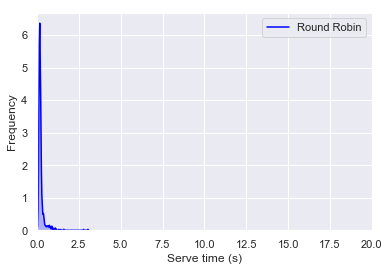

In [31]:
ax = plt.subplot()
sns.distplot(RR_serveTime, label="Round Robin", hist=False, color='blue', kde_kws={"shade": True}, ax=ax, kde=True)
plt.xlabel("Serve time (s)")
plt.ylabel("Frequency")
plt.xlim( 0, 20)
plt.legend()

       Server Processing time (s)
count                  750.000000
mean                     0.228848
std                      0.204234
min                      0.000020
25%                      0.146454
50%                      0.182065
75%                      0.235964
max                      3.126844


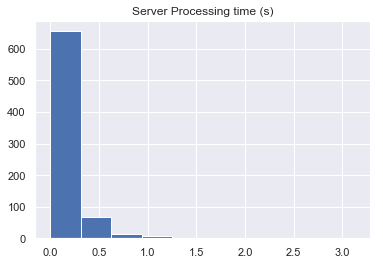

In [32]:
CPU_based_serveTime=Get_aggregation(KID1_serve_time_CPUbased, KID3_serve_time_CPUbased, KID7_serve_time_CPUbased, KID9_serve_time_CPUbased, KID11_serve_time_CPUbased)

C:\Users\Yusuke\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Frequency')

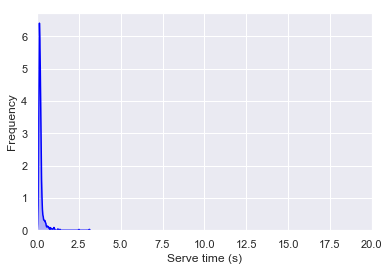

In [33]:
ax = plt.subplot()
sns.distplot(CPU_based_serveTime, hist=False, color='blue', kde_kws={"shade": True}, ax=ax, kde=True)
plt.xlabel("Serve time (s)")
plt.xlim( 0, 20)
plt.ylabel("Frequency")

       Server Processing time (s)
count                  750.000000
mean                     0.247506
std                      0.270481
min                      0.000025
25%                      0.150814
50%                      0.186989
75%                      0.240864
max                      3.892716


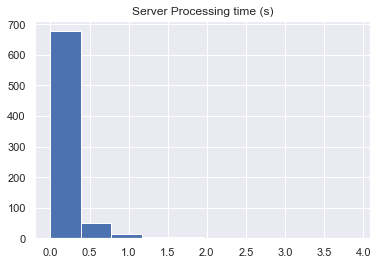

In [34]:
Thermal_based_serveTime=Get_aggregation(KID1_serve_time_Thermalbased, KID3_serve_time_Thermalbased, KID7_serve_time_Thermalbased, KID9_serve_time_Thermalbased, KID11_serve_time_Thermalbased)

C:\Users\Yusuke\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


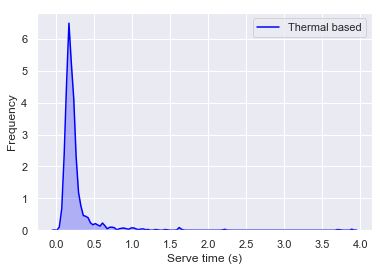

In [35]:
ax = plt.subplot()
sns.distplot(Thermal_based_serveTime, label="Thermal based", hist=False, color='blue', kde_kws={"shade": True}, ax=ax, kde=True)
plt.xlabel("Serve time (s)")
plt.ylabel("Frequency")
plt.legend()

In [36]:
df_servetime=pd.DataFrame({'Round Robin':
                 pd.concat([KID1_serve_time_RR, KID3_serve_time_RR, KID7_serve_time_RR, KID9_serve_time_RR, KID11_serve_time_RR]).mean(),
                 'CPU Utilization based':
                 pd.concat([KID1_serve_time_CPUbased, KID3_serve_time_CPUbased, KID7_serve_time_CPUbased, KID9_serve_time_CPUbased, KID11_serve_time_CPUbased]).mean(),
                 'CPU temperature based':
                 pd.concat([KID1_serve_time_Thermalbased, KID3_serve_time_Thermalbased, KID7_serve_time_Thermalbased, KID9_serve_time_Thermalbased, KID11_serve_time_Thermalbased]).mean()
                })

df_algotime=pd.DataFrame({'Round Robin':
                 df_algo_time_RR.mean()-1,
                 'CPU Utilization based':
                 df_algo_time_CPUbased.mean()-1,
                 'CPU temperature based':
                 df_algo_time_Thermalbased.mean()-1
                })
table_time=pd.concat([df_algotime, df_servetime])
#table_time.index.names=['Average algorithm latency time (s)', 'Average server processing time (s)']
table_time.rename(index={'Latency (s)':'Average queueing latency time (s)', 'Server Processing time (s)':'Average server processing time (s)'})

,Round Robin,CPU Utilization based,CPU temperature based
Average queueing latency time (s),0.001640,0.001782,0.001664
Average server processing time (s),0.237389,0.228848,0.247506


In [37]:
(0.237+0.229+0.248)/3

0.238

In [39]:
(CPU_based_serveTime.mean()+Thermal_based_serveTime.mean()+RR_serveTime.mean())/3

Server Processing time (s)    0.237914
dtype: float64